# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Navin Singh
Bangalore
Date- 17/01/2024  



# Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

# Project Description 

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

# About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

# You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

# Dataset Attributes
Here is the description of all the variables:

•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign

# Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)

Dataset Link-

* https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
* https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv 
* https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv

In [1]:
# Import Some Important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load DataSet
bank=pd.read_csv('bank.csv')

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [4]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
bank.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')>

In [6]:
bank.shape

(11162, 17)

In [7]:
print ('Number of samples: ',len(bank))

Number of samples:  11162


In [8]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [10]:
bank['age']

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [12]:
bank.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
#count the number of rows for each type
bank.sum()

age                                                     460231
job          admin.admin.technicianservicesadmin.management...
marital      marriedmarriedmarriedmarriedmarriedsinglemarri...
education    secondarysecondarysecondarysecondarytertiaryte...
default      nonononononononononononononononononononononono...
balance                                               17061547
housing      yesnoyesyesnoyesyesyesyesyesyesyesyesyesyesyes...
loan         nononononoyesyesnononononoyesnonononononoyesno...
contact      unknownunknownunknownunknownunknownunknownunkn...
day                                                     174775
month        maymaymaymaymaymaymaymaymaymaymaymaymaymaymaym...
duration                                               4152195
campaign                                                 27999
pdays                                                   572950
previous                                                  9293
poutcome     unknownunknownunknownunknownunknownunknown

In [15]:
bank.value_counts()

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  deposit
18   student     single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes        1
45   management  single    tertiary   no       483      no       no    cellular   23   feb    95        2          265   11        other     yes        1
                 married   tertiary   no       3643     no       no    cellular   21   nov    162       1         -1     0         unknown   no         1
                                               4119     yes      yes   telephone  31   aug    473       2          283   1         success   yes        1
                                               22815    no       no    cellular   26   aug    653       8         -1     0         unknown   no         1
                                                                                 

In [16]:
bank.columns.value_counts()

age          1
day          1
poutcome     1
previous     1
pdays        1
campaign     1
duration     1
month        1
contact      1
job          1
loan         1
housing      1
balance      1
default      1
education    1
marital      1
deposit      1
Name: count, dtype: int64

In [17]:
#shape of dataset
bank.shape

(11162, 17)

In [18]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [19]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [20]:
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

In [21]:
# no null values
pd.isnull(bank).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Here we can see that, there are no any null values are prasent

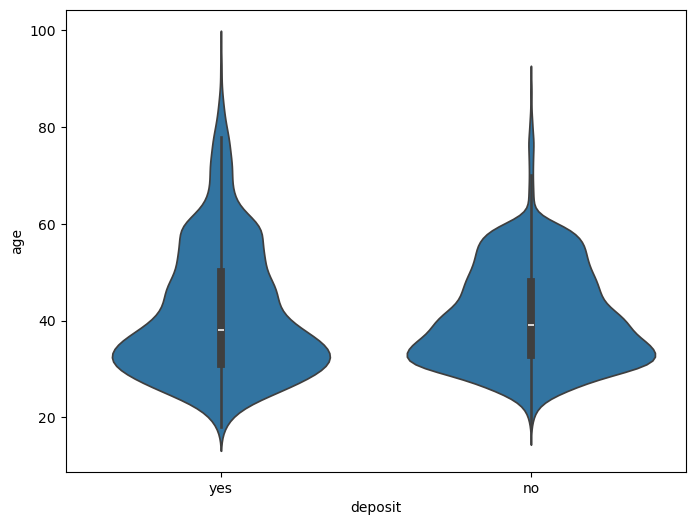

In [22]:
#violin plot for age
sns.violinplot(x="deposit", y="age", data=bank )
plt.show()

Age : This is age of client. A violin plot for age is plotted. It shows its spread as well as histogram. People saying yes has more spread.

deposit
no     5873
yes    5289
Name: count, dtype: int64


<Axes: xlabel='deposit', ylabel='count'>

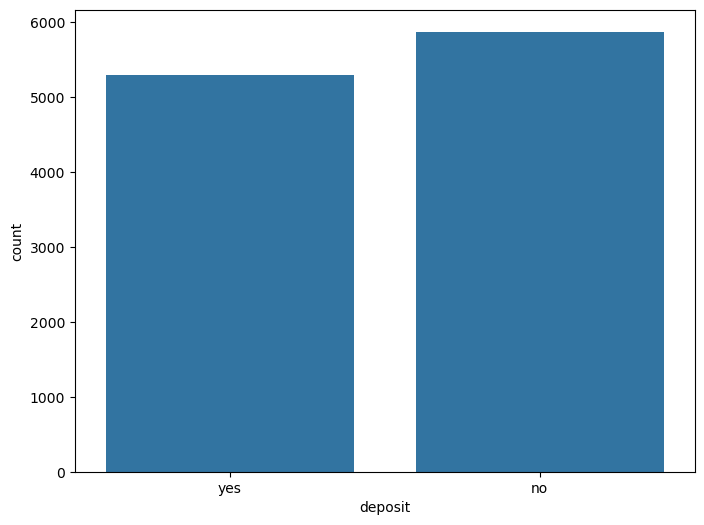

In [23]:
# count plot for deposit
#the dataset is fairly balanced
print(bank["deposit"].value_counts())
sns.countplot(data=bank,x=bank['deposit'])

Deposit : Whether the clients said yes to subscribe for a term deposit. It has two categories. ‘yes’ or ‘no’.

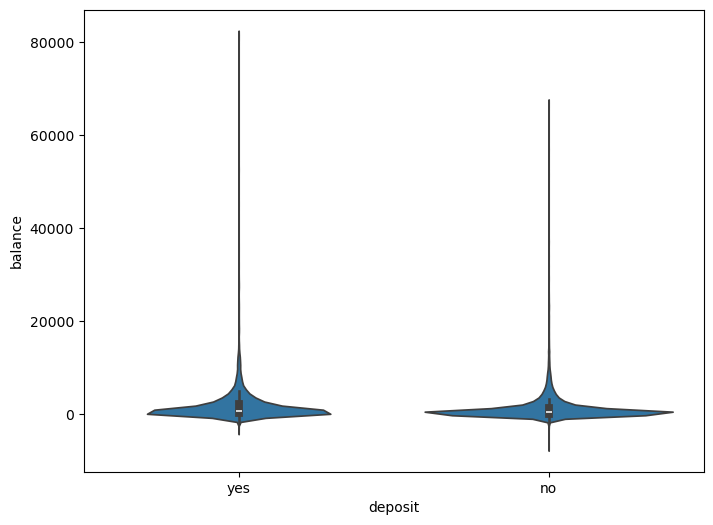

In [24]:
#violin plot for balance
sns.violinplot(x="deposit", y="balance", data=bank)
plt.show()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64


<Axes: xlabel='poutcome'>

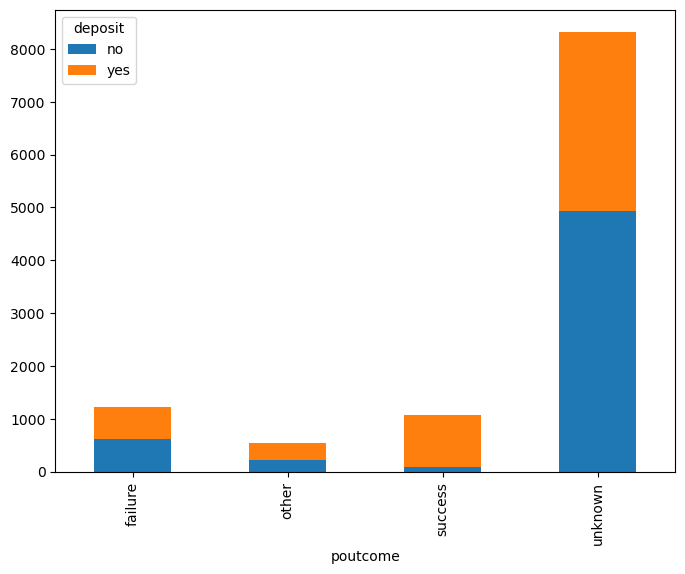

In [25]:
print(bank["poutcome"].value_counts())

print(bank["poutcome"].value_counts())


types = bank.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

poutcome : The outcome of previous marketing campaign. It’s a categorical feature. Many of them were not contacted in previous campaign.

In [26]:
bank["previous"].value_counts()

previous
0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
17      11
14       6
15       5
19       4
16       2
20       2
27       2
23       2
40       1
41       1
28       1
18       1
58       1
55       1
26       1
21       1
22       1
30       1
29       1
37       1
Name: count, dtype: int64

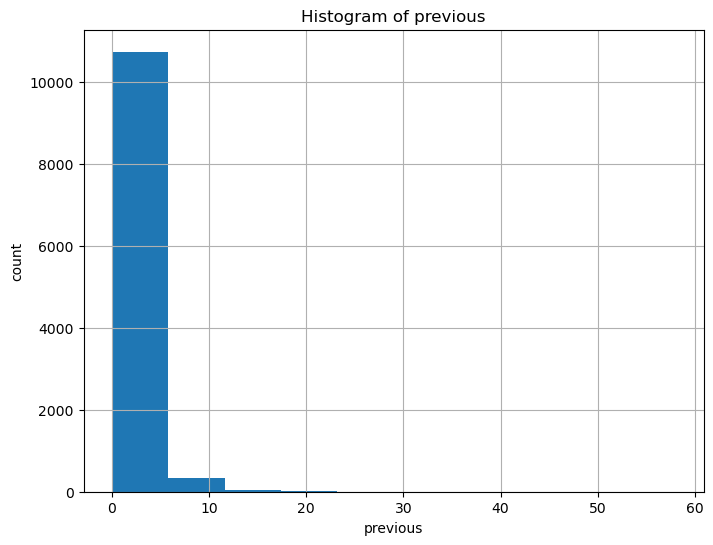

In [27]:
#histogram of previous
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

Previous : Number of times this client was contacted before this campaign.

In [28]:
bank["pdays"].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

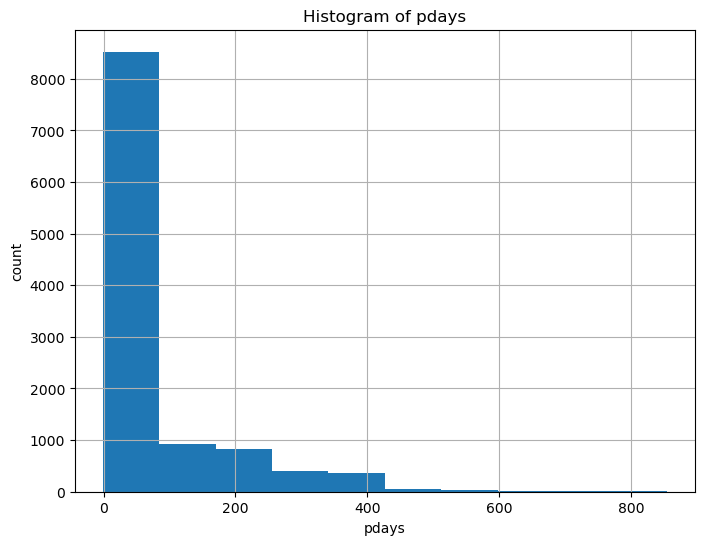

In [29]:
#histogram of pdays
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

Pdays : number of days that passed after the client was last contacted in previous campaign. Its value is -1 if the client was not contacted previously.

In [30]:
bank["campaign"].value_counts()

campaign
1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: count, dtype: int64

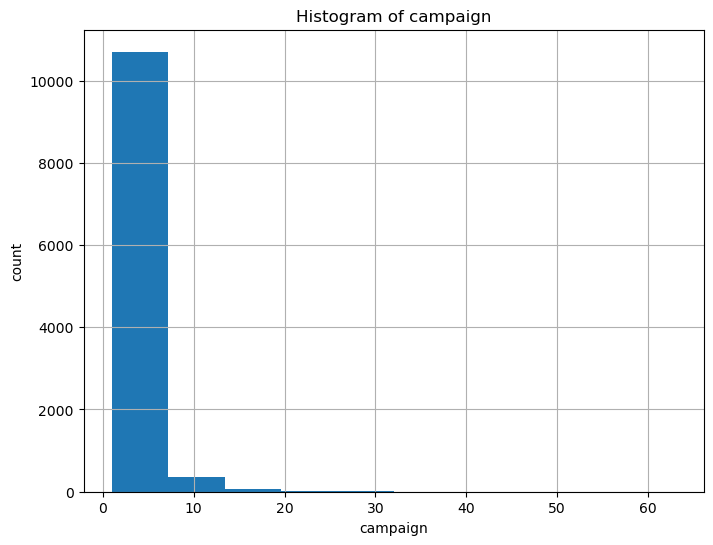

In [31]:
#Histogram of campaign
bank['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

campaign : Number of times this client was contacted during this campaign.

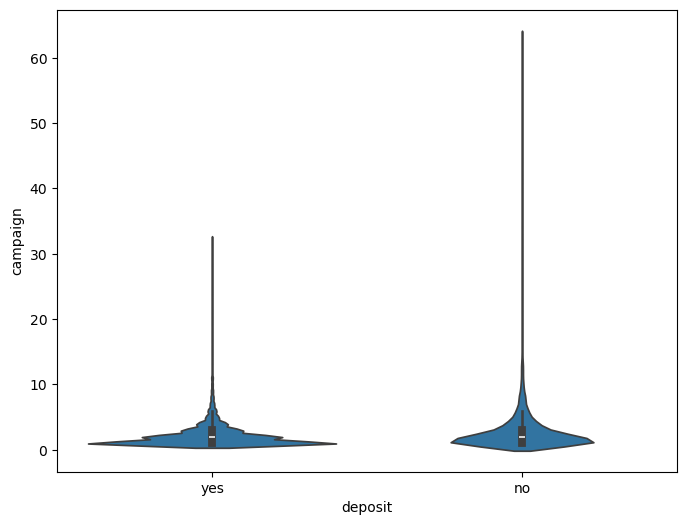

In [32]:
#violin plot for campaign
sns.violinplot(x="deposit", y="campaign", data=bank)
plt.show()

In [33]:
bank["month"].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

<Axes: xlabel='month'>

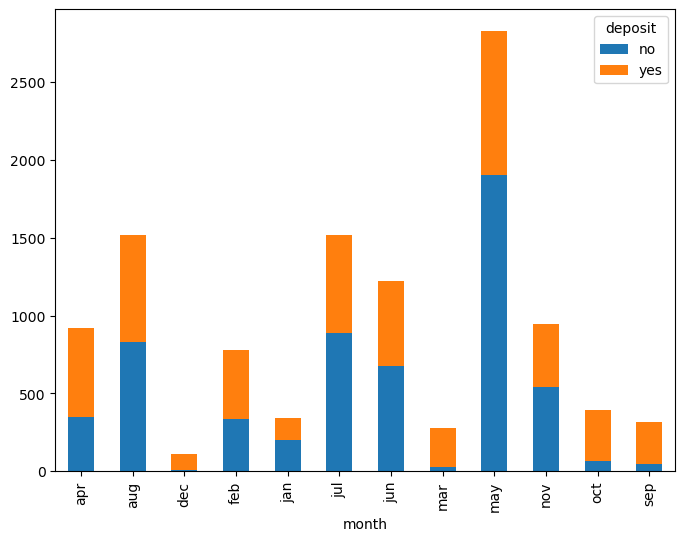

In [34]:
#bar chart for month
types = bank.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Month : the month in which the client was contacted. Maximum clients were contacted in May.

In [35]:
bank["day"].value_counts()

day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: count, dtype: int64

<Axes: xlabel='day'>

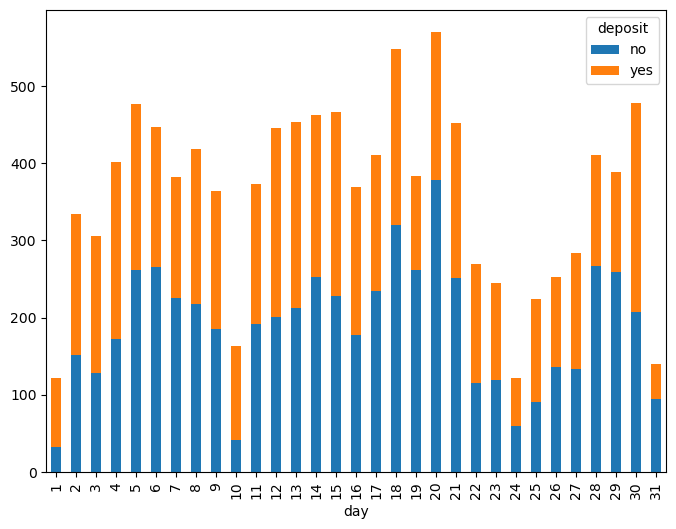

In [36]:
# group by days to display bar chart
types = bank.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Day : which day of the month was the client contacted. More clients were contacted in the middle of the month.

In [37]:
bank["contact"].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

<Axes: xlabel='contact'>

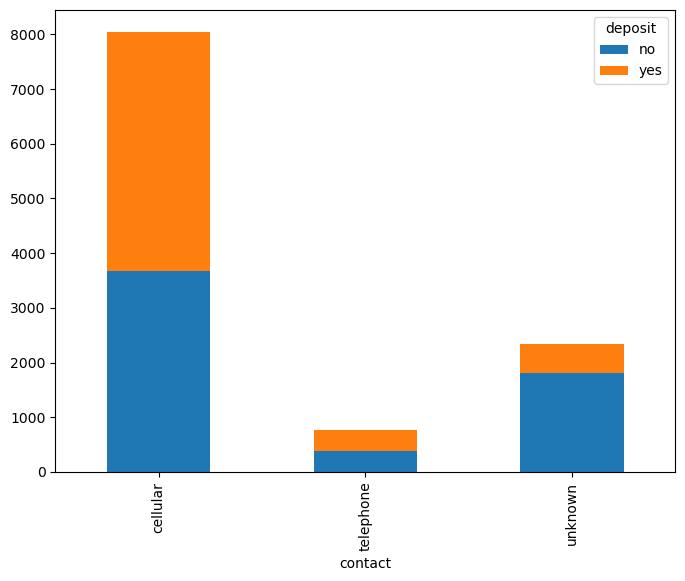

In [38]:
# group by contact to display bar chart
types = bank.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Contact : This feature specifies the way of communication. It can be cellular or telephone. Some of them are unknown.

In [39]:
bank["loan"].value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

<Axes: xlabel='loan'>

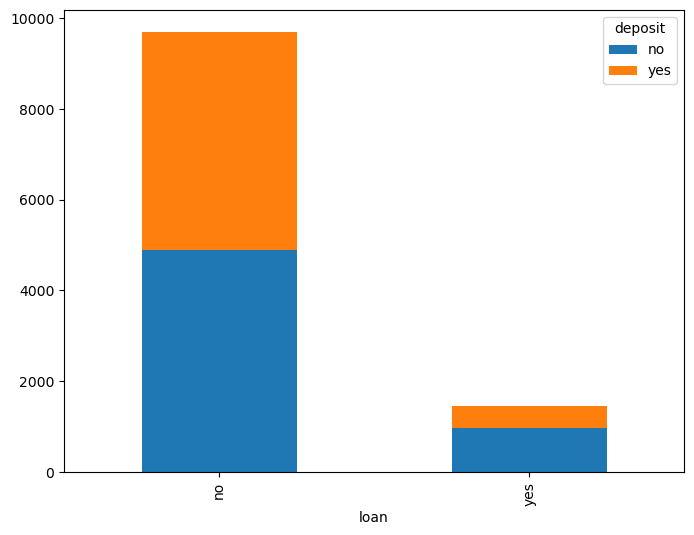

In [40]:
# group by loan to display bar chart
types = bank.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Loan : Most of them don’t already have personal loan in bank.

<Axes: xlabel='marital'>

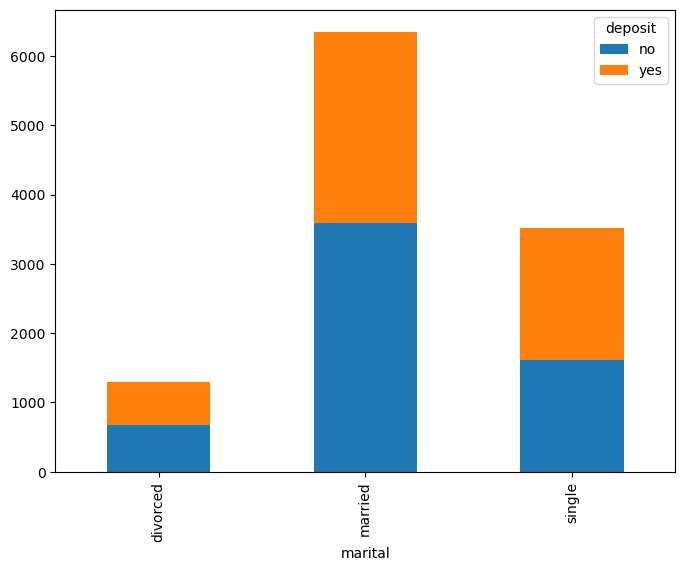

In [41]:
# group by marital to display bar chart
types = bank.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Marital : This is a categorical feature. It has 3 categories. Married clients constitute the largest portion of this feature.

In [42]:
bank["housing"].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

<Axes: xlabel='housing'>

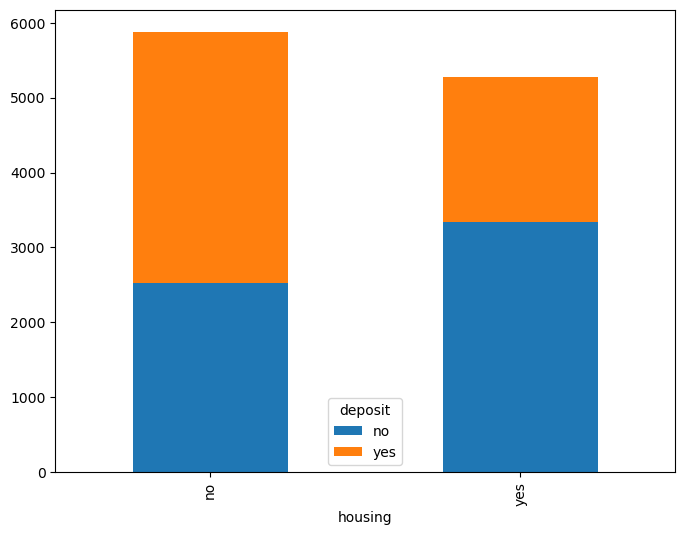

In [43]:
# group by housing to display bar chart
types = bank.groupby("housing")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Housing : Whether the client has already got any housing loan from bank? Apparently clients who do not already have housing loan tend to subscribe to deposit more.

In [44]:
bank["default"].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

<Axes: xlabel='default'>

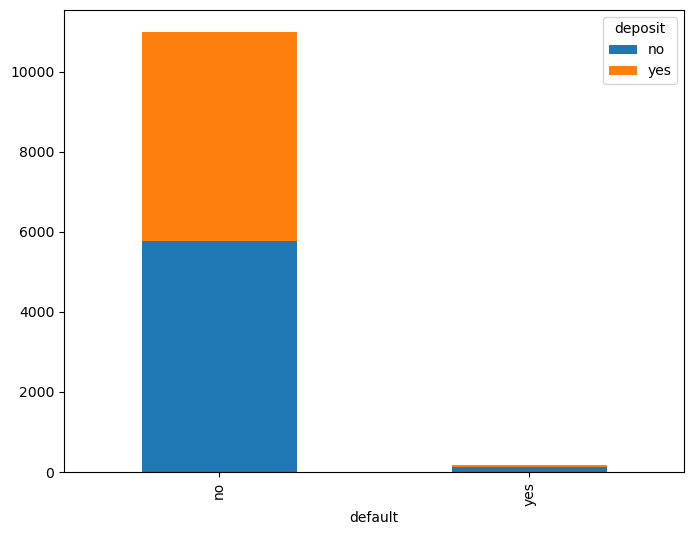

In [45]:
# group by default to display bar chart
types = bank.groupby("default")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Default : it tells whether the client has credit in bank or not? Most of them don’t have credit.

In [46]:
bank["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

<Axes: xlabel='job'>

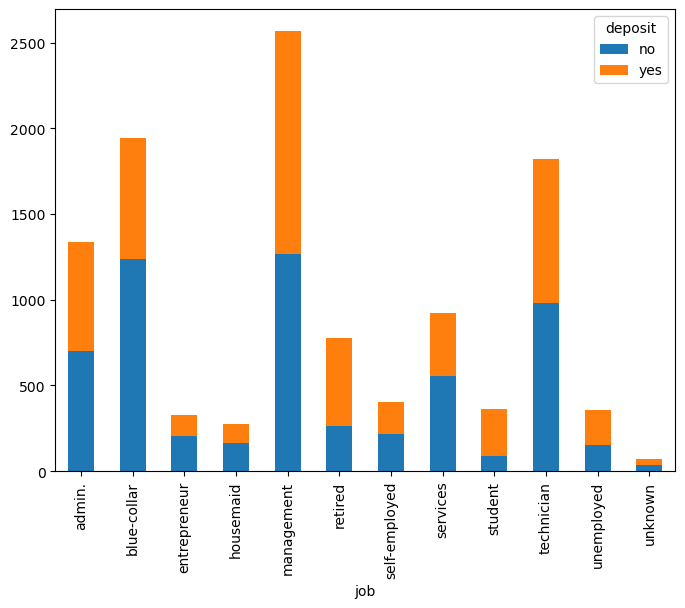

In [47]:
# group by job to display bar chart
types = bank.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Job : This is a categorical feature. It has 12 categories including unknown. The largest clients in this category belong to management jobs with percentage of 50 while unknown category has least count.

In [48]:
bank["education"].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

<Axes: xlabel='education'>

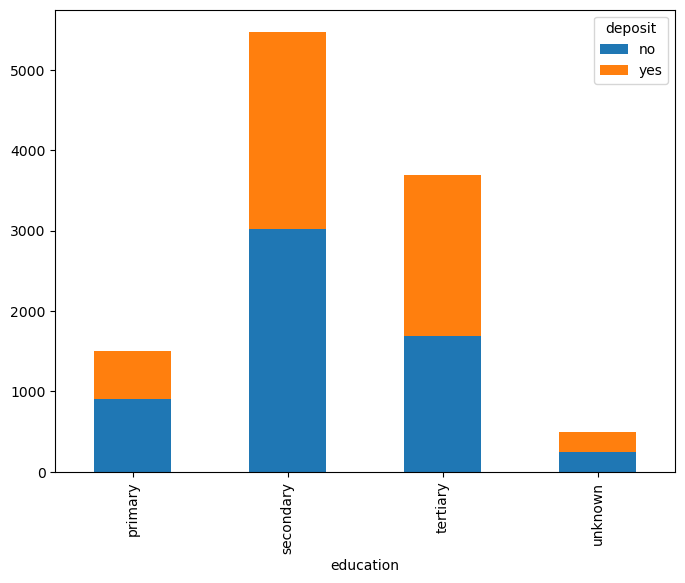

In [49]:
# group by education to display bar chart
types = bank.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Education : Maximum clients belong to category of secondary education. The category tertiary education has larger ratio of clients saying yes to term deposit than any other category.

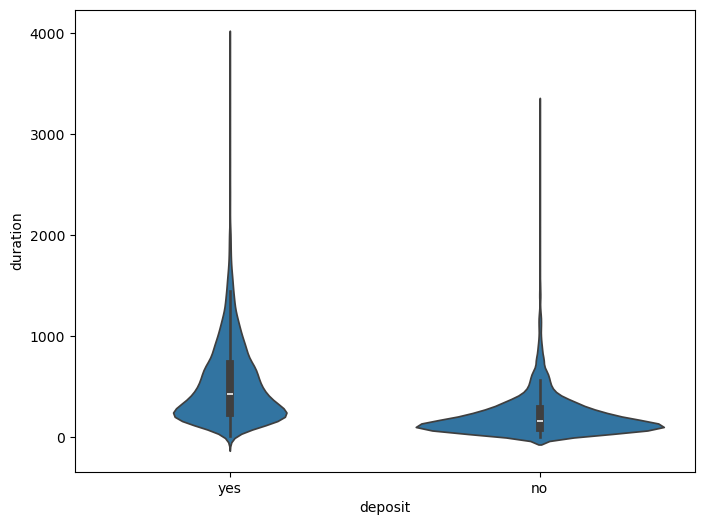

In [50]:
#violin plot for duration
sns.violinplot(x="deposit", y="duration", data=bank)
plt.show()

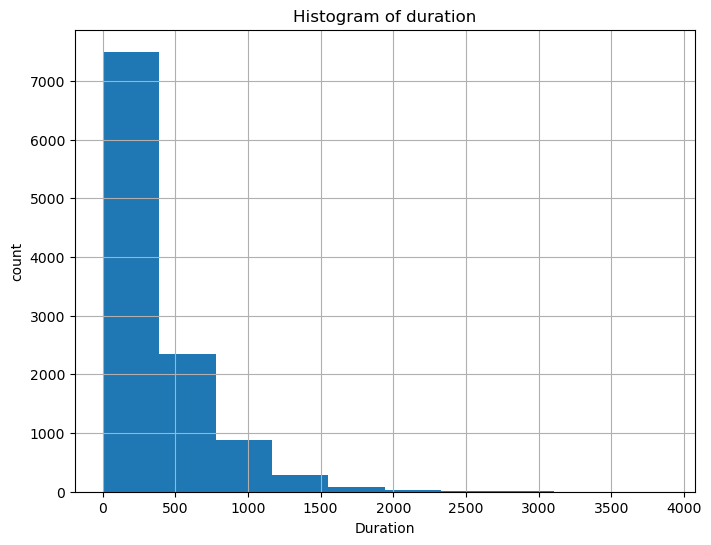

In [51]:
#Histogram of duration
bank['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

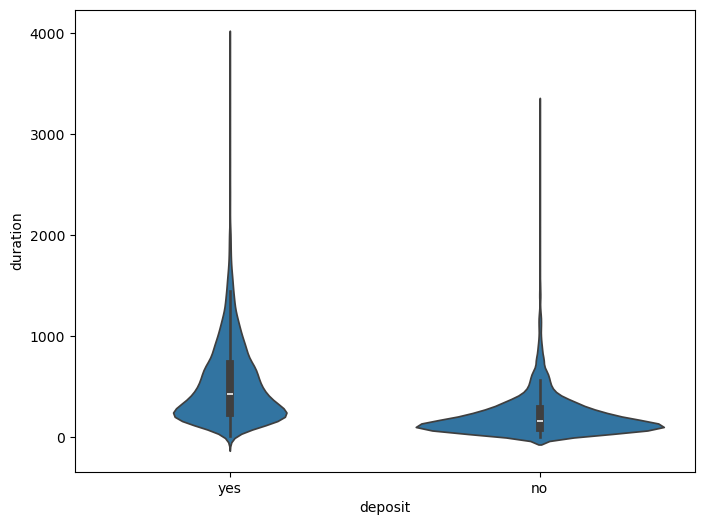

In [52]:
sns.violinplot(x="deposit", y="duration", data=bank)
plt.show()

Duration : The duration of call in seconds when the client was contacted last time. A histogram is plotted for this and there are very less number of clients having very long duration. Violin plot indicates that people with longer duration have more possibility of saying yes to deposit.

# Preprocessing

In [53]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
bank['deposit'].replace(to_replace='yes', value=1, inplace=True)
bank['deposit'].replace(to_replace='no',  value=0, inplace=True)
bank['deposit'].head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [54]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
bank['loan'].replace(to_replace='no', value=1, inplace=True)
bank['loan'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [55]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
bank['default'].replace(to_replace='no', value=1, inplace=True)
bank['default'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,1,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,1,184,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [56]:
bank["loan"].value_counts()

loan
1    9702
0    1460
Name: count, dtype: int64

In [57]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
bank['housing'].replace(to_replace='no', value=1, inplace=True)
bank['housing'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1


In [58]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['marital'])
bank = bank.drop('marital',axis = 1)
bank = bank.join(one_hot)

In [59]:
bank = bank.drop('divorced',axis = 1)

In [60]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single
0,59,admin.,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1,True,False
1,56,admin.,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1,True,False
2,41,technician,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1,True,False
3,55,services,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1,True,False
4,54,admin.,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1,True,False


In [61]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['education'])
bank = bank.drop('education',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,primary,secondary,tertiary
0,59,admin.,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1,True,False,False,True,False
1,56,admin.,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1,True,False,False,True,False
2,41,technician,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1,True,False,False,True,False
3,55,services,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1,True,False,False,True,False
4,54,admin.,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1,True,False,False,False,True


In [62]:
one_hot = pd.get_dummies(bank['job'])
bank = bank.drop('job',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,59,1,2343,0,1,unknown,5,may,1042,1,...,False,False,False,False,False,False,False,False,False,False
1,56,1,45,1,1,unknown,5,may,1467,1,...,False,False,False,False,False,False,False,False,False,False
2,41,1,1270,0,1,unknown,5,may,1389,1,...,False,False,False,False,False,False,False,False,True,False
3,55,1,2476,0,1,unknown,5,may,579,1,...,False,False,False,False,False,False,True,False,False,False
4,54,1,184,1,1,unknown,5,may,673,2,...,False,False,False,False,False,False,False,False,False,False


In [63]:
# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['contact'])
bank = bank.drop('contact',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,59,1,2343,0,1,5,may,1042,1,-1,...,False,False,False,False,False,False,False,False,False,False
1,56,1,45,1,1,5,may,1467,1,-1,...,False,False,False,False,False,False,False,False,False,False
2,41,1,1270,0,1,5,may,1389,1,-1,...,False,False,False,False,False,False,True,False,False,False
3,55,1,2476,0,1,5,may,579,1,-1,...,False,False,False,False,True,False,False,False,False,False
4,54,1,184,1,1,5,may,673,2,-1,...,False,False,False,False,False,False,False,False,False,False


In [64]:
# one hot encoding for month feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['month'])
bank = bank.drop('month',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('dec',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,59,1,2343,0,1,5,1042,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,56,1,45,1,1,5,1467,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,41,1,1270,0,1,5,1389,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,55,1,2476,0,1,5,579,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,54,1,184,1,1,5,673,2,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [65]:
# one hot encoding for poutcome feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['poutcome'])
bank = bank.drop('poutcome',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('other',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,59,1,2343,0,1,5,1042,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,56,1,45,1,1,5,1467,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,41,1,1270,0,1,5,1389,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,55,1,2476,0,1,5,579,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,54,1,184,1,1,5,673,2,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [66]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            11162 non-null  int64
 1   default        11162 non-null  int64
 2   balance        11162 non-null  int64
 3   housing        11162 non-null  int64
 4   loan           11162 non-null  int64
 5   day            11162 non-null  int64
 6   duration       11162 non-null  int64
 7   campaign       11162 non-null  int64
 8   pdays          11162 non-null  int64
 9   previous       11162 non-null  int64
 10  deposit        11162 non-null  int64
 11  married        11162 non-null  bool 
 12  single         11162 non-null  bool 
 13  primary        11162 non-null  bool 
 14  secondary      11162 non-null  bool 
 15  tertiary       11162 non-null  bool 
 16  admin.         11162 non-null  bool 
 17  blue-collar    11162 non-null  bool 
 18  entrepreneur   11162 non-null  bool 
 19  hous

NOTE All Features are converted to numerical

In [67]:
tempDF=bank['deposit']

In [68]:
bank=bank.drop('deposit',axis=1)

In [69]:
bank['deposit']=tempDF
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
1,56,1,45,1,1,5,1467,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
3,55,1,2476,0,1,5,579,1,-1,0,...,False,False,True,False,False,False,False,False,True,1
4,54,1,184,1,1,5,673,2,-1,0,...,False,False,True,False,False,False,False,False,True,1


In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bank.drop('deposit',axis=1))
scaled_features=scaler.transform(bank.drop('deposit',axis=1))
bank_feat=pd.DataFrame(scaled_features,columns=bank.columns[:-1])
bank_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


In [71]:
bank_feat['deposit']=tempDF

In [72]:
# store standardised data in csv
bank_feat.to_csv("standardisedBank.csv")

# Correlation with Class variable 'deposit'

In [73]:
CorrBank=bank_feat.drop("deposit", axis=1).apply(lambda x: x.corr(bank_feat.deposit))

In [74]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

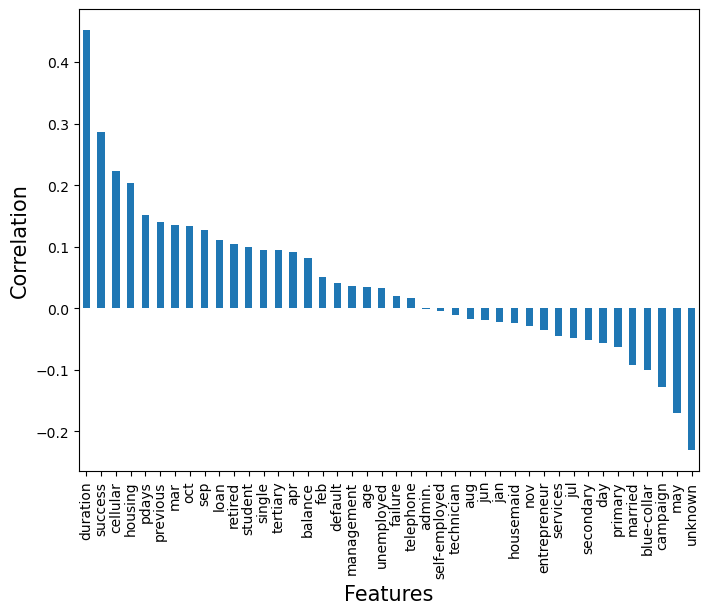

In [75]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

Notes :

1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2. If the call duration is more , there are higher chances of getting a yes from the client.
3. It has been sorted in descending order.
4. Succes , cellular, housing, unknown, campaign are also highly correlated

# KNN, NB, LR, SVM, DT, RF, XGBOOST Modeling

In [76]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [77]:
#Reading Preprocessed data. First column is deleted because its index and redundant
df=pd.read_csv("PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)

In [78]:
#dispaly first 5 rows
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


In [79]:
#Standardisation of Data
scaler=StandardScaler()
scaler.fit(df.drop('deposit',axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


Notes :

1. Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
2. Tree based Algorithms are scale independant
3. standardisation basically subtracts mean and divides std deviation of column from each value

# Train Test Split

In [80]:
# 30% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.30, random_state=3)

# Applying KNN

In [81]:
# trying different odd values of k for KNN and finding accuracy for them

knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.728145763677625, 0.7556652399867703, 0.7614259376299649, 0.7620659787602622, 0.7641156167416029, 0.7610418147106307, 0.7593762996486241, 0.7578411178533653, 0.7560493629061044, 0.7560495266413642, 0.7531065490829187, 0.7538739762452884, 0.7509314898926224, 0.7488831617933596, 0.7499069983724714, 0.747474219883355, 0.7472183016723919, 0.7474753660301732, 0.7472196115544698, 0.7465807165709907]


Text(0, 0.5, 'Accuracy rate')

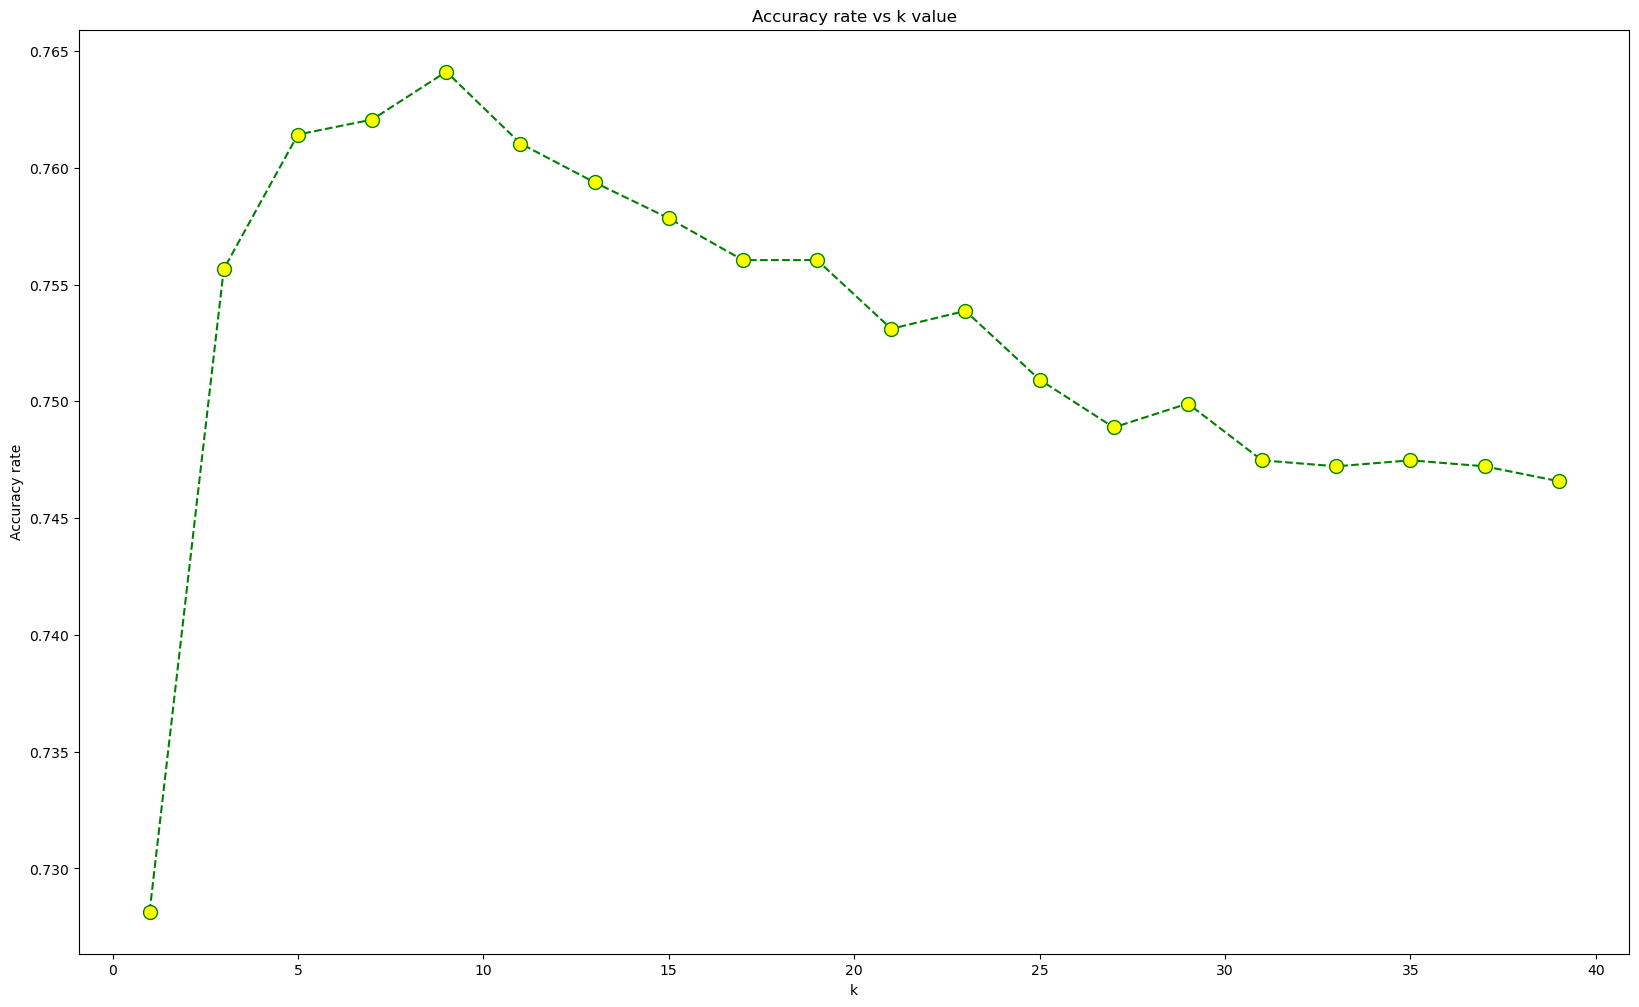

In [82]:
# plotting accuracy of KNN for every value of K. Accuracy is highest when K=9

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [83]:
# TRaining KNN agaib for best value of K
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
aucScoreKNN = roc_auc_score(y_test,  y_pred_prob[:,1])
fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for KNN is ",aucScoreKNN)
print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))
#print("Best parameters for KNN are ",knn.best_params_)

[[1484  290]
 [ 554 1021]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1774
           1       0.78      0.65      0.71      1575

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.75      0.75      3349

AUC score for KNN is  0.8285929027755408
Test Accuracy score for KNN is  0.7479844729770081
Train Accuracy score for KNN is  0.8123640087034429


In [84]:
# Training KNN for different odd values of K to find maximum Recall

knn = KNeighborsClassifier()
recall_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10,scoring='recall')
    recall_rate.append(score.mean())
print(recall_rate)

[0.6777178796046721, 0.6962901776657102, 0.6852599773932702, 0.6779939425557198, 0.6707184882473988, 0.6615634872329942, 0.6542873083499986, 0.6480979914790017, 0.6411007738457525, 0.6357150102889604, 0.6308712285888184, 0.6273708083355071, 0.6206438570559082, 0.6147190099411646, 0.6136408428252615, 0.605561835202736, 0.6050205779207605, 0.603407674694954, 0.6009854215575458, 0.6001818682433411]


Text(0, 0.5, 'Accuracy rate')

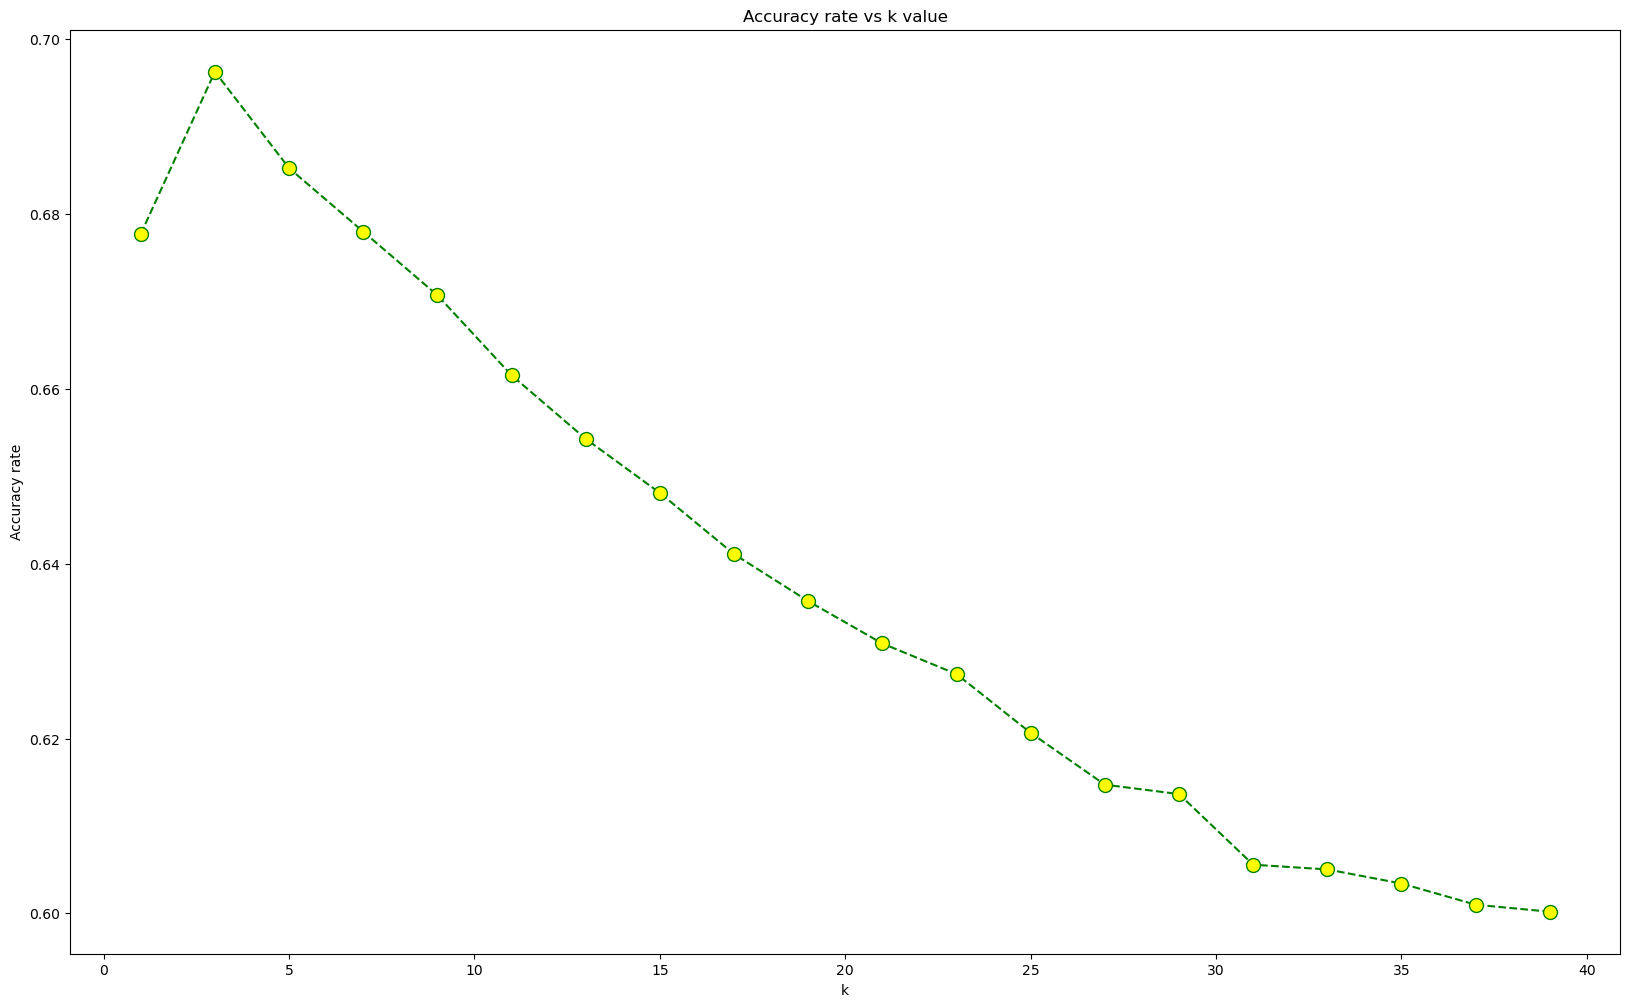

In [85]:
# plotting recall of values of K

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),recall_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("Test Recall score for KNN is ",recall_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Recall score for KNN is ",recall_score(y_train, predT))
#print("Best parameters for KNN are ",knn.best_params_)

Test Recall score for KNN is  0.6819047619047619
Train Recall score for KNN is  0.8387183629509962


Notes:

1. KNN gives accuracy of 0.74 which is not very good
2. There is not much difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.68 whihc is not very good

# Applying Naive Bayes

In [87]:
# Training Naive bayes
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test)
aucScoreNB = roc_auc_score(y_test,  y_pred_prob[:,1])
fprNB, tprNB, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreNB)
print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train)
print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Recall score for NB is ",recall_score(y_test, pred))

[[1517  257]
 [ 737  838]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1774
           1       0.77      0.53      0.63      1575

    accuracy                           0.70      3349
   macro avg       0.72      0.69      0.69      3349
weighted avg       0.72      0.70      0.69      3349

AUC score for NB is  0.7965192104650956
Test Accuracy score for NB is  0.7031949835771872
Train Accuracy score for NB is  0.7317291693331627
Recall score for NB is  0.532063492063492


In [88]:
!pip install -U threadpoolctl

In [89]:
import threadpoolctl

# Applying Logistic Regression

In [90]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 10000]
    }
]
logModel = LogisticRegression()

Notes:

1. Hyperparameters for Logistic Regression
2. Penalty indicates which regularization to use
3. C decides how much weightage is given to Regularization
4. Solver is the technique used internally
5. max_iter is the number of iterations for convergence

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [93]:
from sklearn.feature_selection import SelectKBest, chi2

In [94]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)  # Adjust alpha for feature selection strength

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)  # Reduce to 5 component

# Logistic Regression with Polynomial Features (degree=2)

In [96]:
# Logistic regression with polynomial features works better with normalozation instead of standardization
# so read file again

df=pd.read_csv("PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)
dfX=df.drop('deposit',axis=1)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


In [97]:
# Minmaxscaler is used to normalise data

scaler = MinMaxScaler()
bankMM = scaler.fit_transform(dfX)
bankMM = pd.DataFrame(bankMM, columns=dfX.columns)
bankMM.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,0.532468,1.0,0.104371,0.0,1.0,0.133333,0.268110,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.493506,1.0,0.078273,1.0,1.0,0.133333,0.377675,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.298701,1.0,0.092185,0.0,1.0,0.133333,0.357566,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.480519,1.0,0.105882,0.0,1.0,0.133333,0.148750,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.467532,1.0,0.079851,1.0,1.0,0.133333,0.172983,0.016129,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
# train test split (70:30)
X_train,X_test,y_train,y_test=train_test_split(bankMM,df['deposit'],test_size=0.30, random_state=3)

In [99]:
# creating polynomial features with degree 2
poly2 = PolynomialFeatures(degree=2)
X_trainP=poly2.fit_transform(X_train)

In [100]:
# Hyperparameters 
param_grid = {'penalty' : ['l1', 'l2'], 'C' : [0.001,0.01,0.1,1,5,25]    }

In [101]:
# create polynomial features with degree 2 for test data
X_testP=poly2.fit_transform(X_test)

In [102]:
logModel = LogisticRegression()
clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall',verbose=True, cv = 5,n_jobs=-1 )
# best_clfR = clfR.fit(X_trainP,y_train)

Notes:

1. Logistic regression with polynomial features degree 2 gives accuracy of 0.84 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.83 which is quite goo

# Logistic Regression with Polynomial Features (degree=3)

In [103]:
poly3 = PolynomialFeatures(degree=3)
X_trainP=poly3.fit_transform(X_train)

In [104]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy',verbose=True, cv = 5,n_jobs=-1 )
# best_clf = clf.fit(X_trainP,y_train)

In [105]:
# create polynomial features with degree 2 for test data
X_testP=poly3.fit_transform(X_test)

In [107]:
# Training Logistic Regression for recall

logModel = LogisticRegression()
clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall',verbose=True, cv = 5,n_jobs=-1 )
# best_clfR = clfR.fit(X_trainP,y_train)

Notes:

1. Logistic regression with polynomial features degree 3 gives accuracy of 0.73 which is quite poor
2. There is not huge difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.64 which is poor

# Applying SVM

In [108]:
classifier = SVC(probability=True)
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {'C':[1,10,100,1000],'kernel': ['poly'], 'degree':[2,3,4]}      ]

In [109]:
clf = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=5)
# best_clf = clf.fit(X_train,y_train)

In [110]:
# Training SVM for recall

clfR = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='recall',cv=5)
# best_clfR = clfR.fit(X_train,y_train)

# Applying Decision Tree

In [111]:
dfX=df.drop('deposit',axis=1)
dfX.head()
X_train,X_test,y_train,y_test=train_test_split(dfX,df['deposit'],test_size=0.30, random_state=3)

In [112]:
dt=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_samples_leaf':[1,2,3,4,5],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy']}

In [113]:
clf = GridSearchCV(dt,parameters,scoring='accuracy',verbose=True)
# best_clf = clf.fit(X_train,y_train)

In [114]:
#Gridsearchcv Training Decision Tree for recall

clfR = GridSearchCV(dt,parameters,scoring='recall',verbose=True)
# best_clfR = clfR.fit(X_train,y_train)

Notes:

1. Decision Tree gives accuracy of 0.81 which is quite good
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.82 which is quite good

# Applying Random Forest

In [115]:
rf = RandomForestClassifier()

parameters={'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [500, 1000, 1500,  2000]}

In [116]:
clf=GridSearchCV(estimator = rf, param_grid = parameters,scoring='accuracy', cv = 5, verbose = True)
# best_clf = clf.fit(X_train,y_train)

In [117]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
# best_clfR = clfR.fit(X_train,y_train)

Notes:

1. Random Forest gives accuracy of 0.84 which is quite good
2. There is quite difference between train and test accuracy but its not severe overfitting or underfitting
3. Recall is 0.88 which is very good

# Applying XGBoost

In [118]:
params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }

In [119]:
xgb_model = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
# clf = GridSearchCV(xgb_model, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
# best_clf = clf.fit(X_train,y_train)

In [121]:
#Gridsearchcv And Training XGBBOST for recall
clfR = GridSearchCV(xgb_model, param_grid = params, scoring = 'recall',cv = skf.split(X_train, y_train),verbose=True)
# best_clfR = clfR.fit(X_train,y_train)

Notes:

1. XGBOOST gives accuracy of 0.85 which is best amongst them
2. There is very less difference between train and test accuracy so its not overfitting or underfitting
3. Recall is 0.88 which is really Good
4. XGBBOST is basically an implementation of GBDT Gradint Boosting Decision Tree
5. XGBOOST have given us the best result so far


# Feature Importance using XGBOOST

In [123]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
best_clf = XGBClassifier(colsample_bytree= 0.94, eta= 0.25000000000000006, gamma= 5, min_child_weight= 1.5, subsample= 0.94,objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
# best_clf.fit(X_train,y_train)

Notes:

1. XGBOOST gives us best results so find important feaures for it
2. As per the feature importance of XGBOOST it is clear that bank need to focus more on clients with success in previous campaign. Whether client uses cellular phone or not and the month in which client is being called play a vital role

# ROC Curve

In [126]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [130]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
result_table.set_index('classifiers', inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


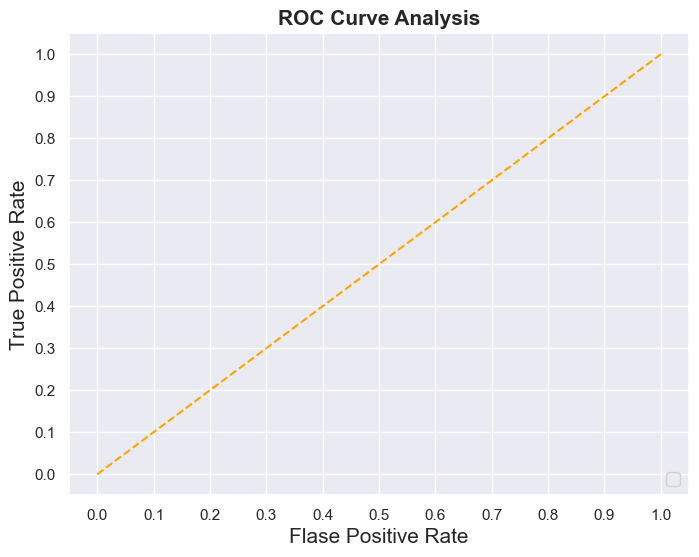

In [132]:
# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

# Plotting all ROC in one plot

sns.set()

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

NOTES:

1. Random Forest and XGBOOST has best AUC
1. Many of them have gives more or less same value of AUC

Thank You
* Navin Singh 